In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
import pandas as pnd
import seaborn as sns
import subprocess

# pathex = "/home/gabriel/Desktop/ProjectFiles/ColloidalMembranes/CodeMega/DataAnalysis/Round9"
# pathpiwall = "/home/gabriel/Desktop/ProjectFiles/ColloidalMembranes/CodeMega/DataAnalysis/PiWall"
pathex = "/home/repos/colloidal_membranes_v2/data_viz/media"
pathpores = "/home/repos/colloidal_membranes_v2/data_viz/extracted_data/single_pore_round_9"
pathpiwall = "/home/repos/colloidal_membranes_v2/data_viz/extracted_data/piwall"
p = 0.05

In [2]:
sns.set_theme(font_scale = 2)

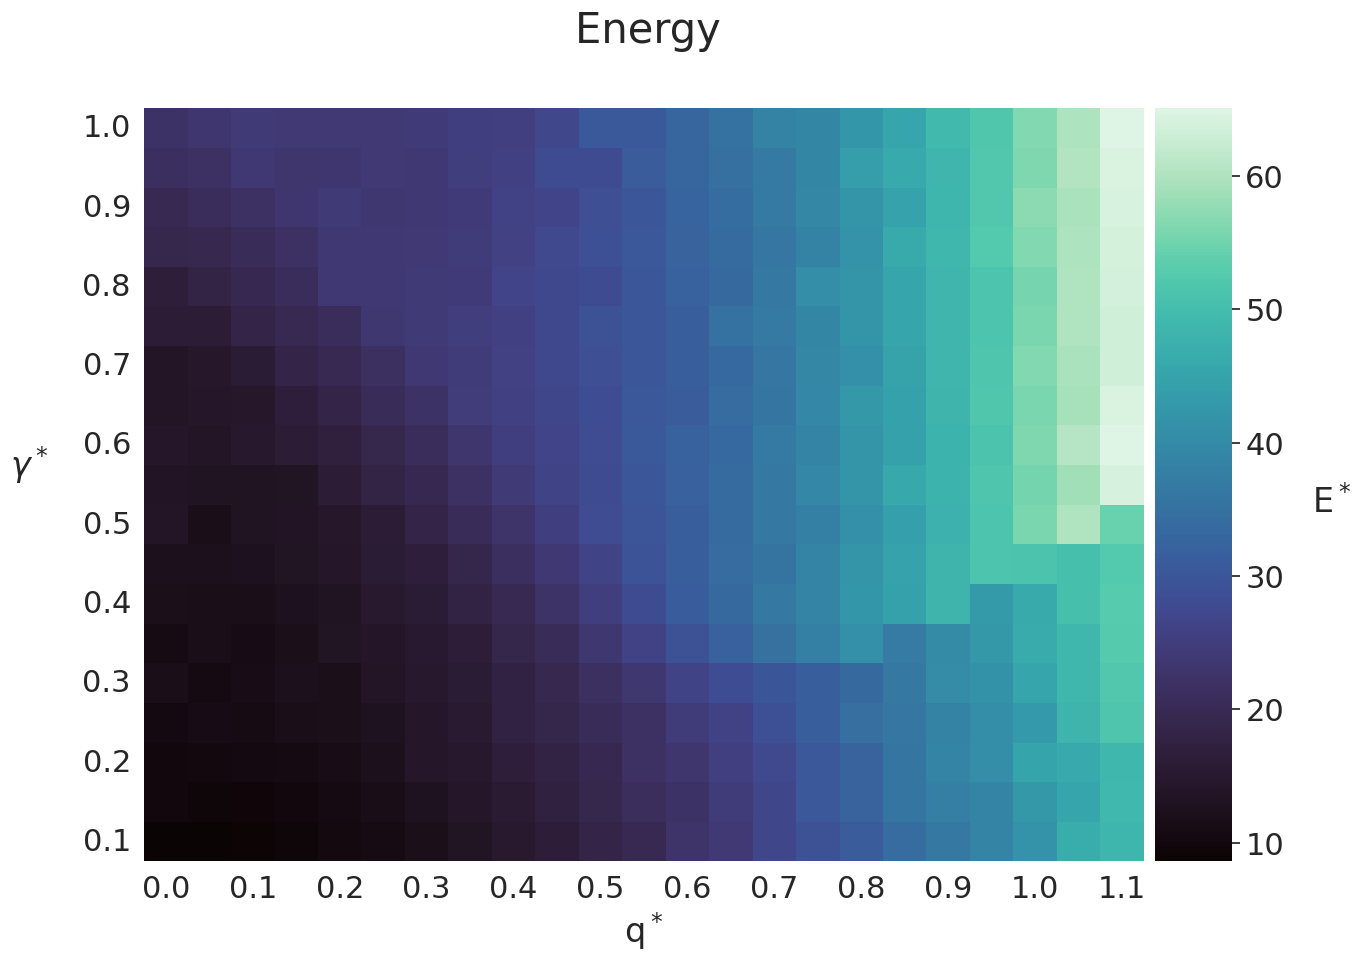

In [3]:
pop = "\n"
delimiter = ","
porenergies = open(pathpores+"/EnergyData.txt","r")
energydata = porenergies.readlines()[1:]
dic = {"p":[], "g":[], "q":[], "Energy":[]}
for line in energydata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["p"].append(float(line[0]))
    dic["g"].append(float(line[1]))
    dic["q"].append(float(line[2]))
    dic["Energy"].append(float(line[3]))
df = pnd.DataFrame(dic)

f1slice = df["p"] == p
f1sliced = df[f1slice]

gs = list(set(df["g"]))
qs = list(set(df["q"]))

gs.sort()
qs.sort()

en = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["Energy"].iloc[0] for q in qs] for g in gs])


en = np.array([[round(en[i, j], ndigits=4) for j in np.arange(0, len(en[1, :]), 1)] for i in np.arange(0, len(en[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Energy     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(en, annot = False, cmap = "mako", linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel(r"        E$^*$", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)


plt.show()
fig.savefig(pathex +f"/EnergyDiagramp={p}.png", dpi = 300)

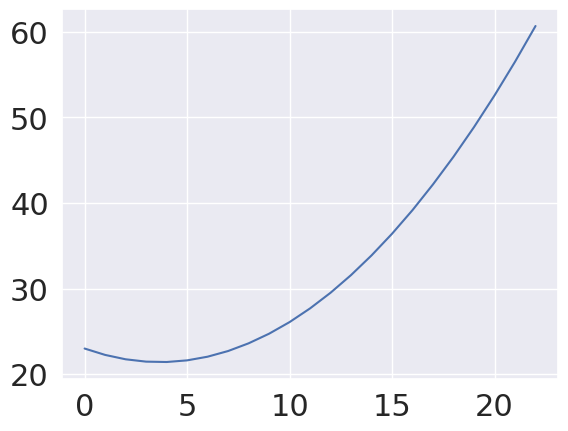

In [4]:
pop = "\n"
delimiter = ","
piwallenergies = open(pathpiwall+"/EnergyData.txt","r")
piwallenergydata = piwallenergies.readlines()[1:]
dic = {"p":[], "q":[], "Energy":[]}
for line in piwallenergydata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["p"].append(float(line[0]))
    dic["q"].append(float(line[1]))
    dic["Energy"].append(float(line[2]))
pwdf = pnd.DataFrame(dic)

pwslice = pwdf["p"] == p
pwsliced = pwdf[pwslice]

qs = list(set(pwdf["q"]))
qs.sort()

pwarr = np.array([pwsliced[(pwsliced["q"]==q)]["Energy"].iloc[0] for q in qs])

def f(x):
    a = 0.00004
    b = 0.014
    c = 0
    d = 25
    x_0 = 77.5
    return a*(x - x_0 + 5)**3 + b*(x - x_0)**2 + c*(x - x_0) + d 

plt.plot(pwarr)

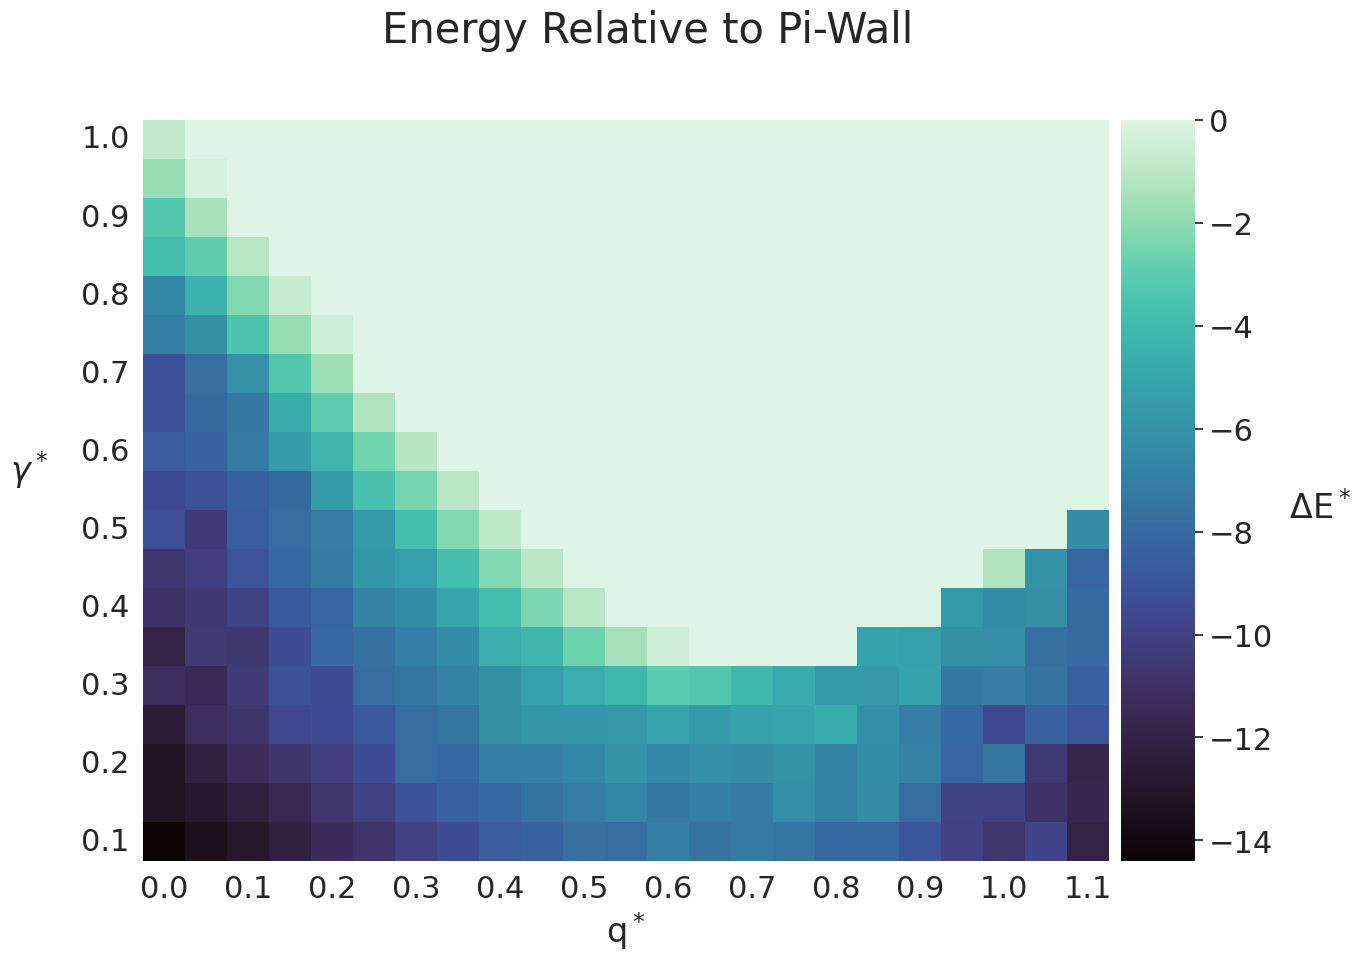

In [5]:
endiff = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["Energy"].iloc[0] - pwsliced[(pwsliced["q"]==q)]["Energy"].iloc[0] for q in qs] for g in gs])


endiff = np.array([[round(endiff[i, j], ndigits=4) if endiff[i, j] < 0 else 0 for j in np.arange(0, len(endiff[1, :]), 1)] for i in np.arange(0, len(endiff[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Energy Relative to Pi-Wall     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(endiff, annot = False, cmap = "mako", linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel(r"        $\Delta$E$^*$", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)


# from scipy import interpolate

# pts = [[-0.1, 1.125],[0.0, 0.95],[0.1, 0.8],[0.5, 0.35],[0.7, 0.3],[0.9, 0.35],[1.0, 0.43],[1.1, 0.54],[1.2, 0.64]]
# x = [0.5+ 10*pt[0] for pt in pts]
# y = [10*pt[1] - 0.5 for pt in pts]
# f = interpolate.interp1d(x,y,kind='cubic')
# xnew = np.arange(0.0, 12, 0.1)
# ynew = f(xnew)   # use interpolation function returned by `interp1d`
# ax2.plot(xnew, ynew, '-')


plt.show()
fig.savefig(pathex +f"/EnergyDiffDiagramp={p}.png", dpi = 300)



In [6]:
from scipy import interpolate
from scipy.interpolate import griddata

In [7]:
from itertools import chain

grid_x, grid_y = np.mgrid[0:1.1:115j, 0.1:1:95j]

points = list(chain(*[[[q,g] for q in qs] for g in gs]))
endiffc =  list(chain(*[[endiff[j,i] for i in range(0,len(qs))] for j in range(0, len(gs))]))

endiffint = griddata(points, endiffc, (grid_x, grid_y), method='nearest')
endiffint = endiffint.T 

print(len(endiffint)*len(endiffint[1]))

ct=0

for i,row in enumerate(endiffint):
    for j,pt in enumerate(row):
        if pt > 0: endiffint[i,j]=0; ct+=1
print(ct)

10925
0


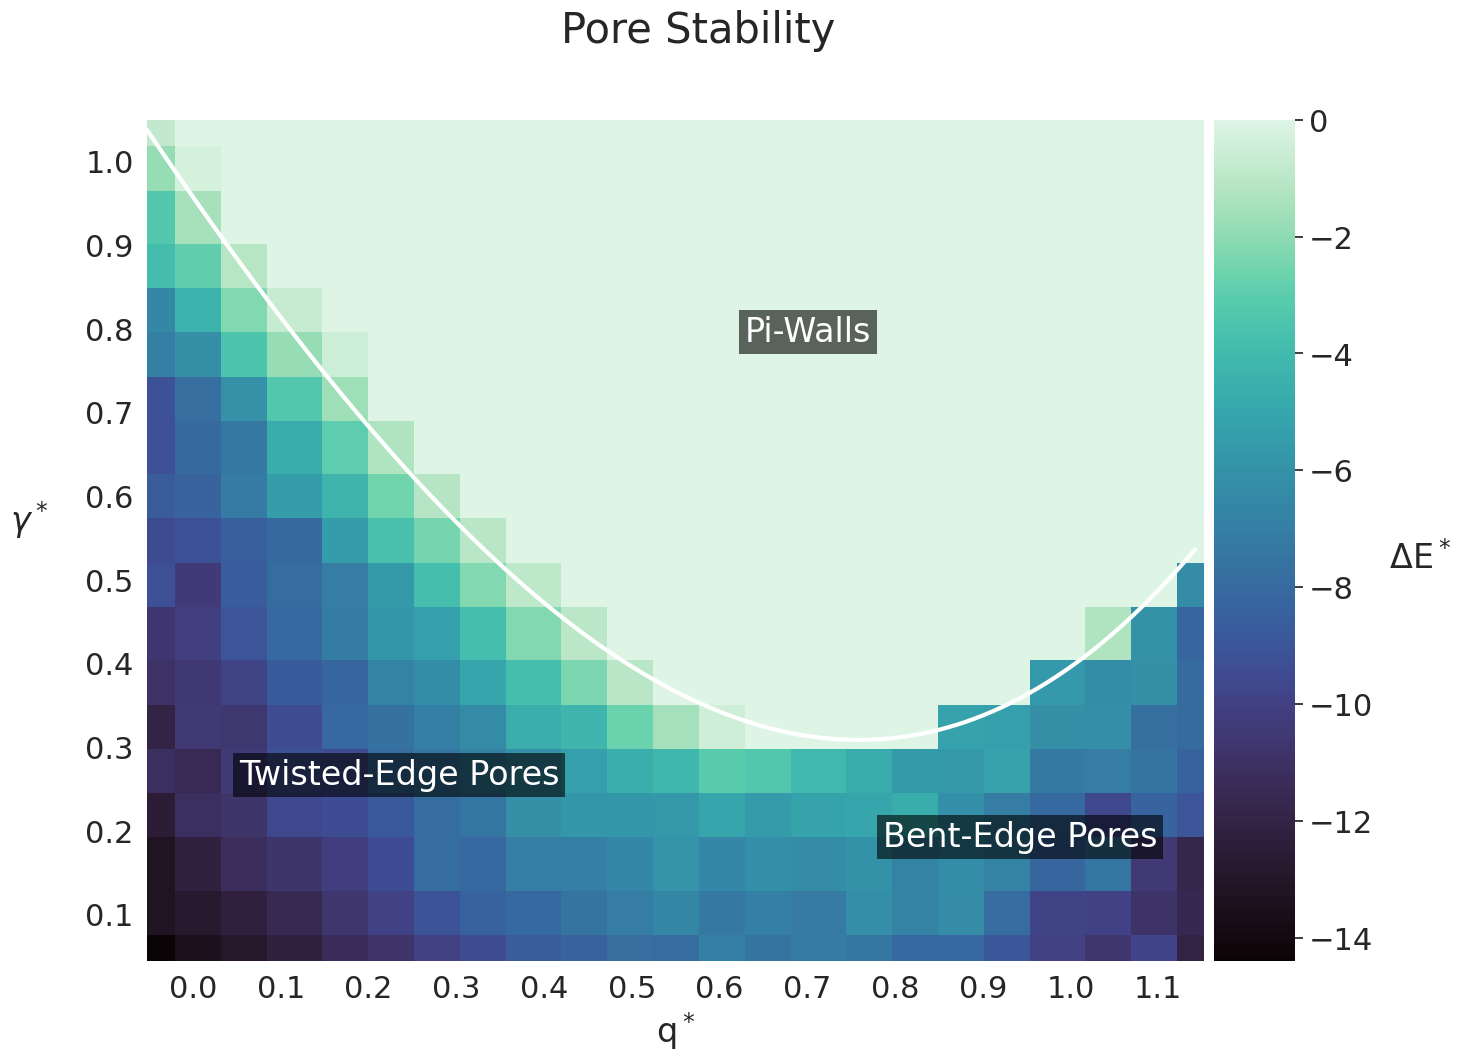

In [14]:
fig = plt.figure(constrained_layout=True)
fig.suptitle("Pore Stability     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+6)/2, (len(gs)+2)/2)
hm = sns.heatmap(endiffint, annot = False, cmap = sns.color_palette("mako", as_cmap=True), linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)

ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel(r"        $\Delta$E$^*$", fontsize = 24, rotation = 0)

ax2.set_yticks(np.linspace(5, 90, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(5, 110, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)


xnew = np.arange(0.0, 115, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
ax2.plot(xnew, ynew, 'w-', lw=3)
# ax2.plot([65, 65], [0, f(65)], 'w--', lw=3)
ax2.text(10,20,"Twisted-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))
ax2.text(65,70,"Pi-Walls", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))
ax2.text(80,13,"Bent-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))

plt.show()
fig.savefig(pathex +f"/PoreStabilityEnergyDiagramp={p}.png", dpi = 300)

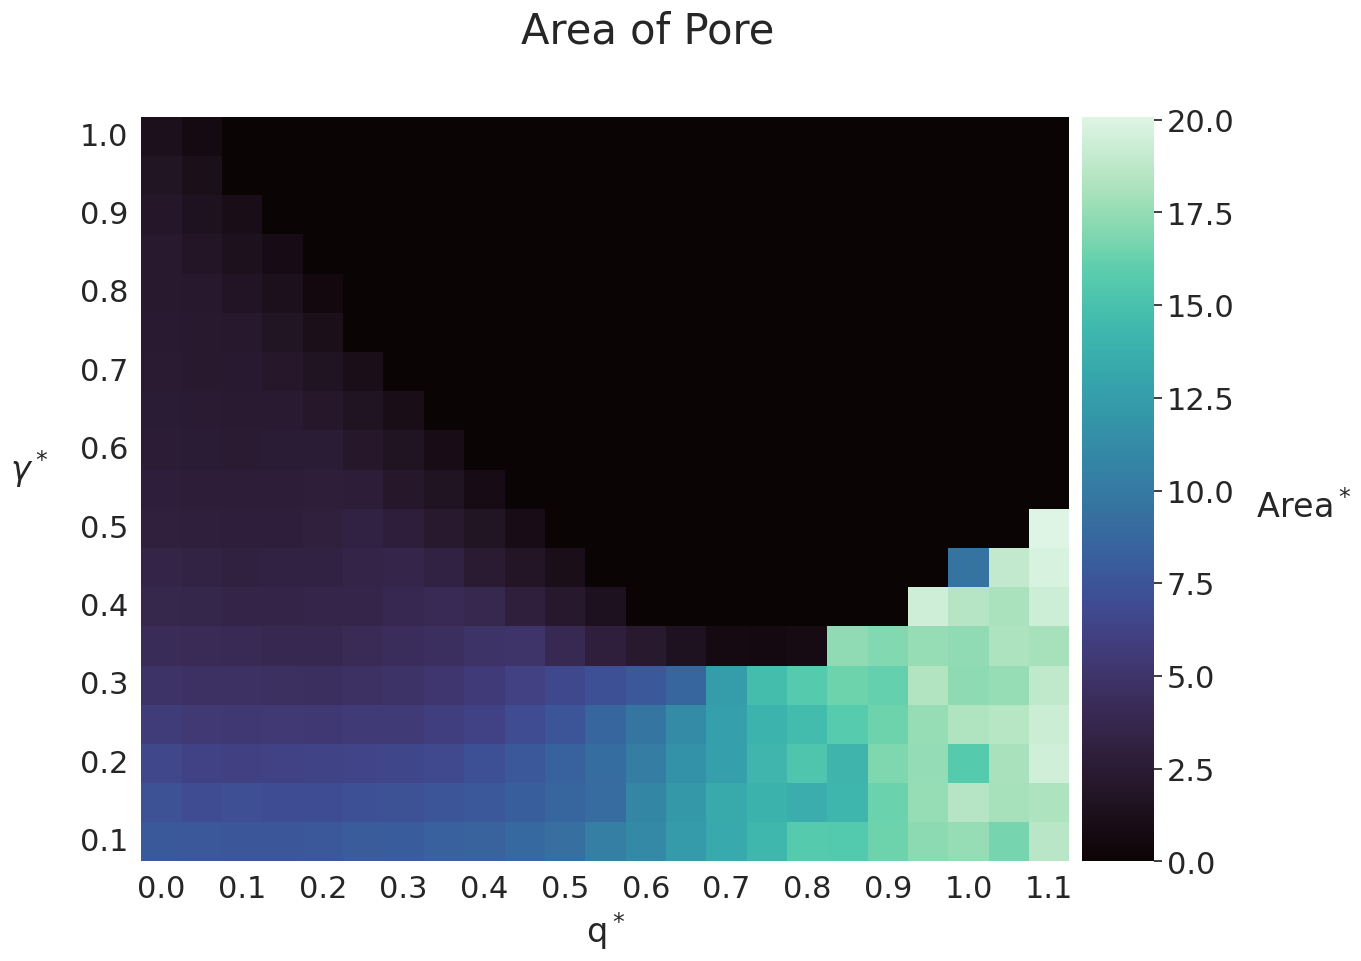

In [9]:
pop = "\n"
delimiter = ","
poresizes = open(pathpores+"/PoreSizeData.txt","r")
sizedata = poresizes.readlines()[1:]
dic = {"g":[], "p":[], "q":[], "pore_area":[]}
for line in sizedata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["g"].append(float(line[0]))
    dic["p"].append(float(line[1]))
    dic["q"].append(float(line[2]))
    dic["pore_area"].append(float(line[3]))
df = pnd.DataFrame(dic)

f1slice = df["p"] == p
f1sliced = df[f1slice]

gs = list(set(df["g"]))
qs = list(set(df["q"]))

gs.sort()
qs.sort()

sizes = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["pore_area"].iloc[0] for q in qs] for g in gs])

sizes = np.array([[round(sizes[i, j], ndigits=4) if sizes[i, j] > 0.5 else 0 for j in np.arange(0, len(sizes[1, :]), 1)] for i in np.arange(0, len(sizes[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Area of Pore     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(sizes, annot = False, cmap = "mako", linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel(r"            Area$^*$", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)



plt.show()
fig.savefig(pathex +f"/PoreSizeDiagramp={p}.png", dpi = 300)



In [10]:

grid_x, grid_y = np.mgrid[0:1.1:115j, 0.1:1:95j]

points = list(chain(*[[[q,g] for q in qs] for g in gs]))
sizesc =  list(chain(*[[sizes[j,i] for i in range(0,len(qs))] for j in range(0, len(gs))]))

sizesint = griddata(points, sizesc, (grid_x, grid_y), method='nearest')
sizesint = sizesint.T 

print(len(sizesint)*len(sizesint[1]))

ct=0

for i,row in enumerate(sizesint):
    for j,pt in enumerate(row):
        if pt < 0.5: sizesint[i,j]=0; ct+=1
print(ct)
ct=0

for row in sizesint:
    for pt in row:
        if pt ==0: pt=0; ct+=1
print(ct)

10925
5276
5276


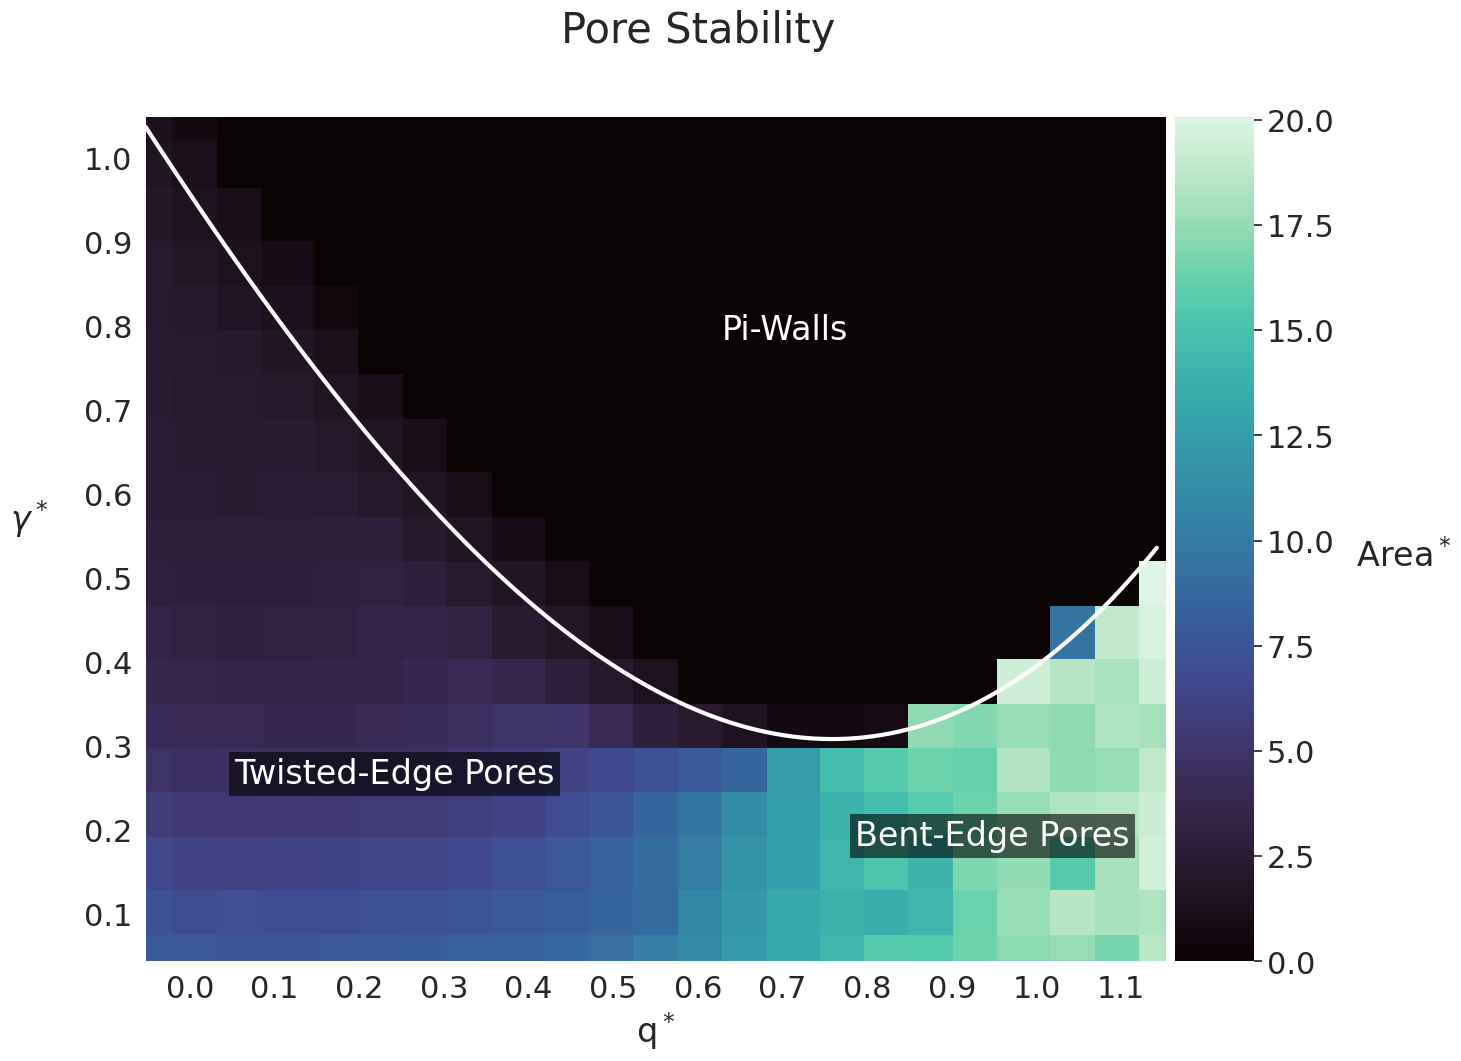

In [11]:
fig = plt.figure(constrained_layout=True)
fig.suptitle("Pore Stability     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+6)/2, (len(gs)+2)/2)
hm = sns.heatmap(sizesint, annot = False, cmap = sns.color_palette("mako", as_cmap=True), linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)

ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel(r"            Area$^*$", fontsize = 24, rotation = 0)

ax2.set_yticks(np.linspace(5, 90, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(5, 110, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)


xnew = np.arange(0.0, 115, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
ax2.plot(xnew, ynew, 'w-', lw=3)
# ax2.plot([65, 65], [0, f(65)], 'w--', lw=3)
ax2.text(10,20,"Twisted-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))
ax2.text(65,70,"Pi-Walls", alpha=1, c='White')
ax2.text(80,13,"Bent-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))

plt.show()
fig.savefig(pathex +f"/PoreStabilitySizeDiagramp={p}.png", dpi = 300)

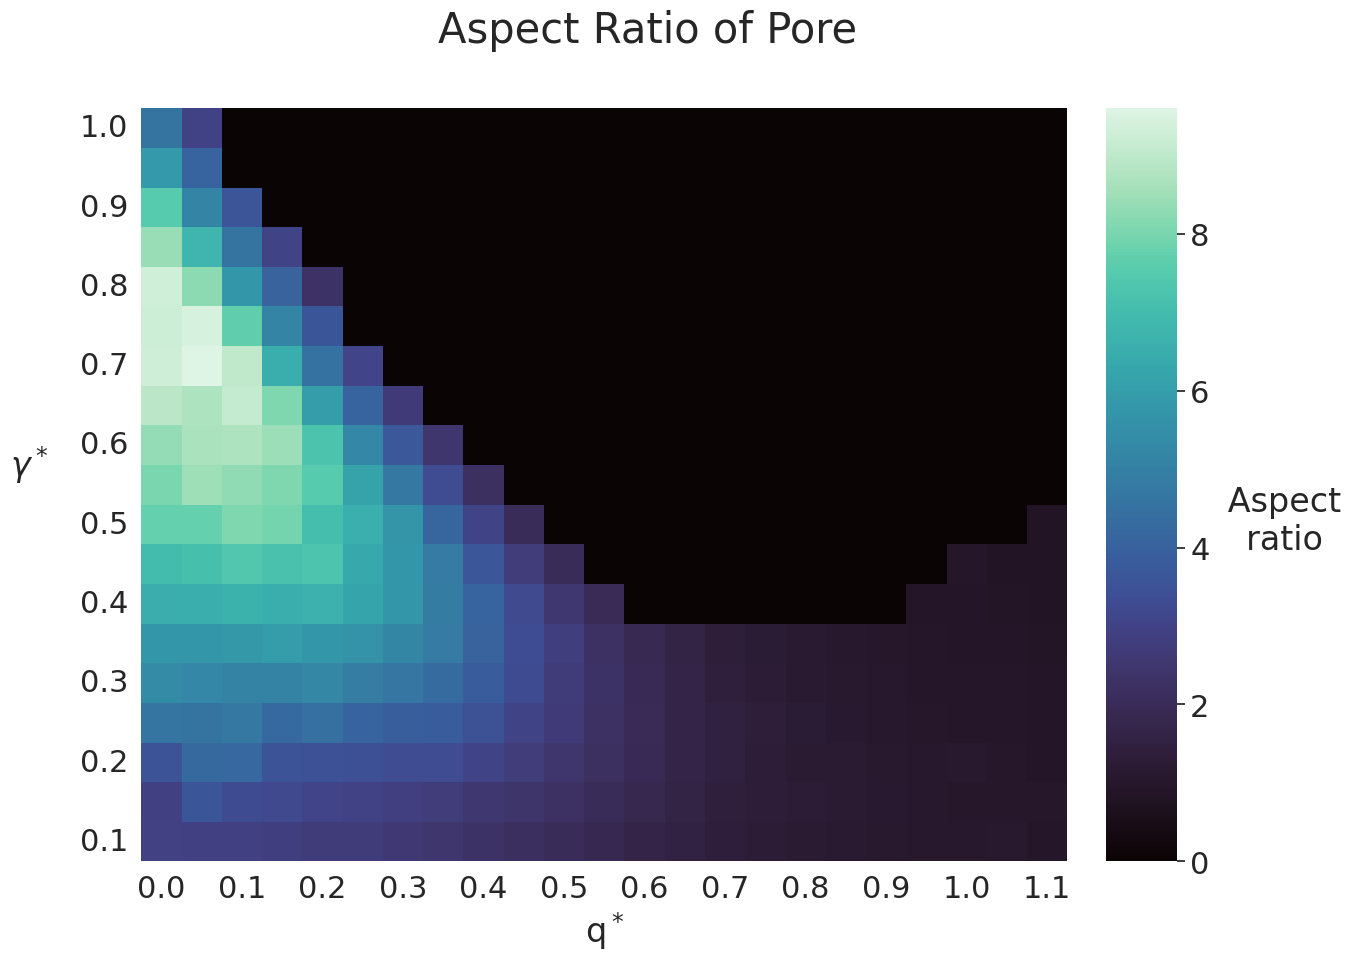

In [12]:
pop = "\n"
delimiter = ","
porears = open(pathpores+"/PoreARData.txt","r")
ardata = porears.readlines()[1:]
dic = {"g":[], "p":[], "q":[], "pore_AR":[]}
for line in ardata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["g"].append(float(line[0]))
    dic["p"].append(float(line[1]))
    dic["q"].append(float(line[2]))
    dic["pore_AR"].append(float(line[3]))
df = pnd.DataFrame(dic)

f1slice = df["p"] == p
f1sliced = df[f1slice]

gs = list(set(df["g"]))
qs = list(set(df["q"]))

gs.sort()
qs.sort()

asprat = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["pore_AR"].iloc[0] for q in qs] for g in gs])

asprat = np.array([[round(asprat[i, j], ndigits=4) if sizes[i, j] > 0.5 else 0 for j in np.arange(0, len(asprat[1, :]), 1)] for i in np.arange(0, len(asprat[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Aspect Ratio of Pore     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(asprat, annot = False, cmap = "mako", linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel("              Aspect \n             ratio", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)



plt.show()
fig.savefig(pathex +f"/PoreAspectDiagramp={p}.png", dpi = 300)

10925
5276


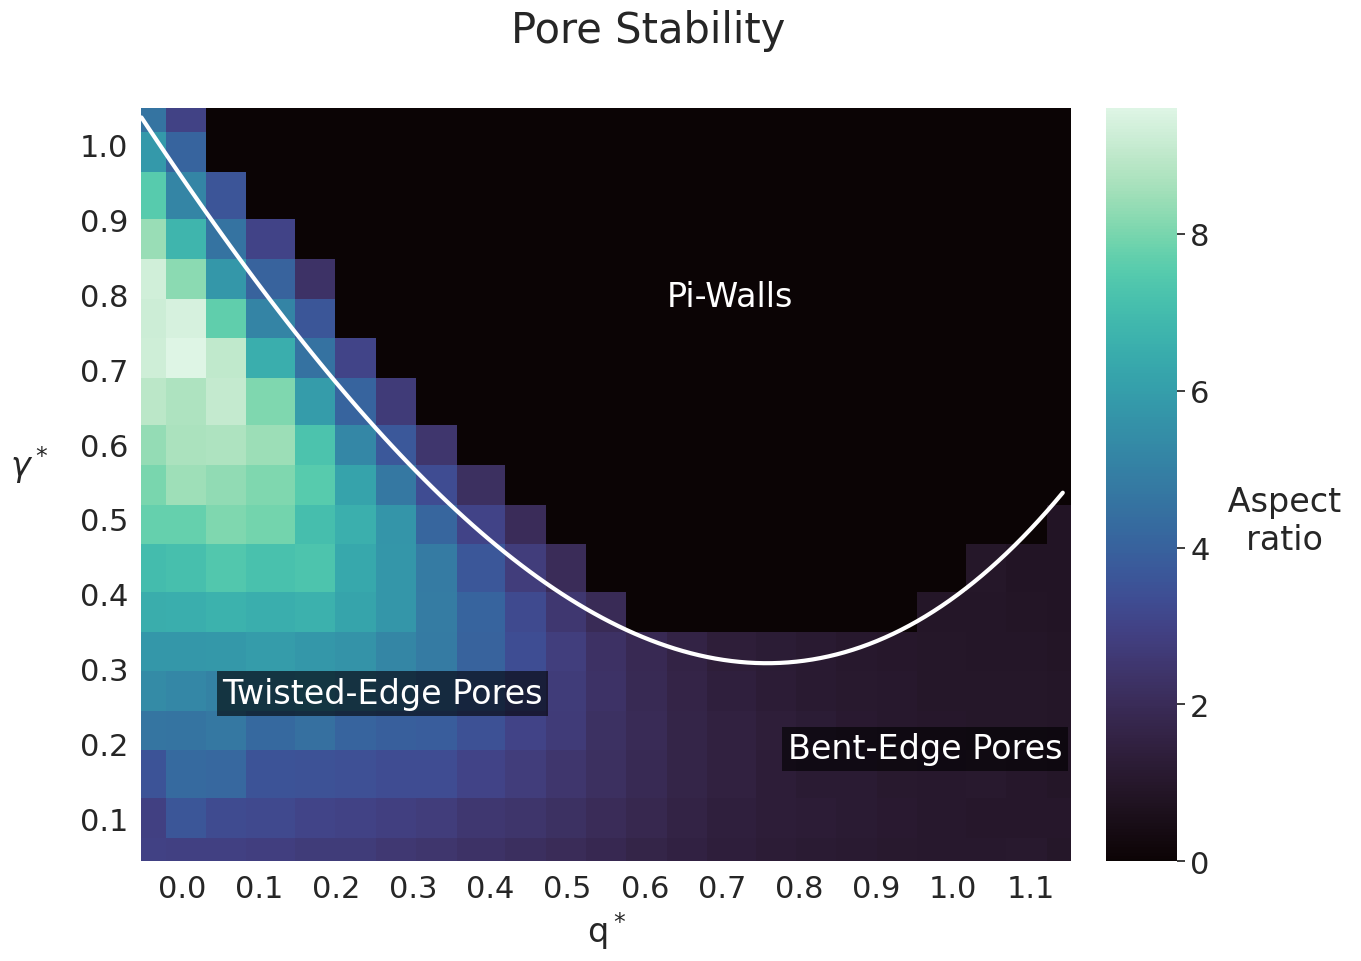

In [13]:
grid_x, grid_y = np.mgrid[0:1.1:115j, 0.1:1:95j]

points = list(chain(*[[[q,g] for q in qs] for g in gs]))
aspratc =  list(chain(*[[asprat[j,i] for i in range(0,len(qs))] for j in range(0, len(gs))]))

aspratint = griddata(points, aspratc, (grid_x, grid_y), method='nearest')
aspratint = aspratint.T 

print(len(aspratint)*len(aspratint[1]))

ct=0

for i,row in enumerate(aspratint):
    for j,pt in enumerate(row):
        if pt < 0.5: aspratint[i,j]=0; ct+=1
print(ct)


fig = plt.figure(constrained_layout=True)
fig.suptitle("Pore Stability     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(aspratint, annot = False, cmap = "mako", linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel(r"q$^*$", fontsize = 24)
ax1.set_ylabel(r"$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel("              Aspect \n             ratio", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(5, 90, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(5, 110, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)

xnew = np.arange(0.0, 115, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
ax2.plot(xnew, ynew, 'w-', lw=3)
# ax2.plot([65, 65], [0, f(65)], 'w--', lw=3)
ax2.text(10,20,"Twisted-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))
ax2.text(65,70,"Pi-Walls", alpha=1, c='White')
ax2.text(80,13,"Bent-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))


plt.show()
fig.savefig(pathex +f"/PoreStabilityARDiagramp={p}.png", dpi = 300)
